In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

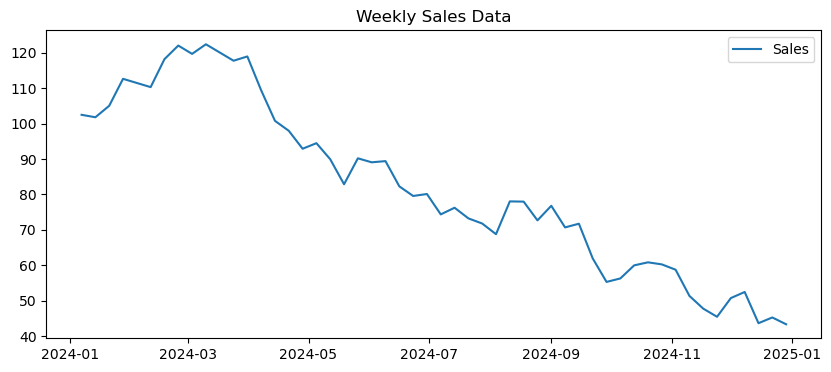

In [7]:


# Generate Dummy Data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=52, freq="W")
sales = 100 + np.random.normal(0, 5, 52).cumsum()  # Random Walk

df = pd.DataFrame({"Date": date_range, "Sales": sales})
df.set_index("Date", inplace=True)

# Plot Data
plt.figure(figsize=(10, 4))
plt.plot(df, label="Sales")
plt.title("Weekly Sales Data")
plt.legend()
plt.show()


In [9]:
model = ARIMA(df["Sales"], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.824
Date:                Wed, 05 Mar 2025   AIC                            307.649
Time:                        18:27:18   BIC                            313.444
Sample:                    01-07-2024   HQIC                           309.863
                         - 12-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9557      0.167      5.728      0.000       0.629       1.283
ma.L1         -0.9129      0.224     -4.068      0.000      -1.353      -0.473
sigma2        21.6379      4.845      4.466      0.0

/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/env

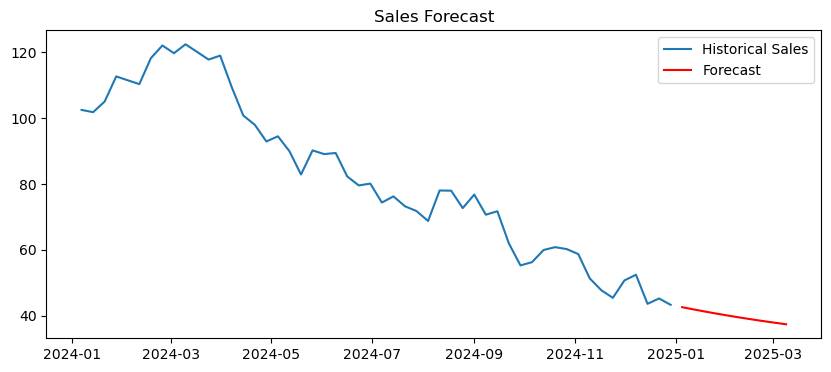

In [10]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
future_dates = [df.index[-1] + timedelta(weeks=i) for i in range(1, forecast_steps+1)]
forecast_df = pd.DataFrame({"Date": future_dates, "Forecast": forecast})
forecast_df.set_index("Date", inplace=True)

# Plot Actual vs Forecast
plt.figure(figsize=(10, 4))
plt.plot(df, label="Historical Sales")
plt.plot(forecast_df, label="Forecast", color="red")
plt.title("Sales Forecast")
plt.legend()
plt.show()